# COMPLATE TEXT PROCESSING

Dataset : https://www.kaggle.com/kazanova/sentiment140/data#

- !pip instrall -U spacy
- !pip instrall -U spacy-looksup-data
- !python -m spacy download en_core_web_sm  <<< small model
- !python -m spacy download en_core_web_md  <<< medium model
- !python -m spacy download en_core_web_lg. <<< large model

## General Feature Extraction
- File loading
- Word counts
- Characters count
- Average Characters per word
- Stop Words count
- Count #HasTags and @Mentions
- If numeric digits are present in twitts
- Upper case words counts

## Preprocessing and Cleaning
- Lower case
- Contraction to Expansion
- Emails removal and Counts
- URLs removal and counts
- Removal of RT
- Removal of Special Characters
- Removal of Multiple spaces
- Removal of HTML Tags
- Removal of accented characters
- Removal of Stopwords
- Conversion into base from of words
- Common Occuring words Removal
- Rare Occuring words Removal
- Word cloud
- Spelling correction
- Tokenization
- Lemmatization
- Detecting Entities using NER
- Noun Detection
- Language Detection
- Sentence Translation
- Using Inbuilt `Sentiment Classifier`

## Advenced Text Processing and Feature Extraction
- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation `TF`
- Inverse Document Frequency `TF-IDF`
- `TFIDF` Term Frequency-Inverse Document Frequency
- Word Embedding `Word2Vec` using SpaCy

## Machine Learning Models for Text Classification
- SGDClassifier3
- LogisticRegression
- LogisticRegressionCV
- LinearSVC
- RandomForestClassifier

## GENERAL FEATURE EXTRACTION

### File Loading

In [266]:
import numpy as np
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import warnings
warnings.filterwarnings("ignore") 

In [267]:
df = pd.read_csv('twitter16m.csv', encoding='latin-1', header=None)

In [268]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [269]:
df = df[[5,0]]
df.head()

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [270]:
df.columns = ['tweets','sentiment']
df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [271]:
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

In [272]:
sent_map = {
    0: 'negative',
    4: 'positive'
}

### Word Counts

In [273]:
df['word_counts'] = df['tweets'].apply(lambda x: len(str(x).split()))
df.head()

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### Characters Count 

In [274]:
df['char_counts'] = df['tweets'].apply(lambda x: len(x))
df.head()

,tweets,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Average Word Length 

In [275]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) # = len(x)/len(words)

In [276]:
df['avg_word_len'] = df['tweets'].apply(lambda x: get_avg_word_len(x))
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


### Stop Words count

In [277]:
print(STOP_WORDS)

{'are', 'less', 'never', 'twenty', 'us', 'further', 'really', 'put', 'would', 'wherein', 'our', 're', '’ve', 'themselves', 'had', 'about', 'see', 'why', 'always', 'hereupon', '‘d', 'everywhere', 'formerly', 'itself', 'amongst', 'regarding', 'anything', 'several', 'someone', 'two', 'should', 'due', 'any', 'via', 'until', 'name', 'first', 'because', 'five', 'anyone', 'you', 'during', 'yourselves', 'out', 'however', 'their', 'well', 'after', 'must', 'mine', 'everyone', 'be', 'hers', 'part', 'we', 'done', 'of', 'the', 'call', 'this', '’s', 'himself', 'since', 'sixty', 'seemed', 'she', 'empty', 'becoming', 'ours', 'below', 'whole', 'rather', 'who', 'full', 'sometimes', 'yourself', 'fifteen', 'them', 'whose', 'his', 'other', 'used', 'somewhere', 'along', 'forty', 'off', 'there', 'thru', 'beforehand', 'her', 'still', 'while', 'hundred', 'herein', 'else', 'twelve', 'none', 'seeming', 'i', 'almost', 'at', 'for', 'too', 'whence', 'besides', 'namely', 'serious', 'by', 'so', 'something', 'every', 

In [278]:
print(len(STOP_WORDS))

326


In [279]:
x = 'this is text data'
x.split() 

['this', 'is', 'text', 'data']

In [280]:
[t for t in x.split() if t in STOP_WORDS]

['this', 'is']

In [281]:
len([t for t in x.split() if t in STOP_WORDS])

2

In [282]:
df['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

0           4
1           9
2           7
3           5
4          10
           ..
1599995     4
1599996     1
1599997     5
1599998     3
1599999     0
Name: tweets, Length: 1600000, dtype: int64

In [283]:
df['stop_words_len'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS])) 
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


### Count #HasTags and @Mentions


In [284]:
x = 'this is a #hashtag and this is @mention'

In [285]:
x.split()

['this', 'is', 'a', '#hashtag', 'and', 'this', 'is', '@mention']

In [286]:
[t for t in x.split() if t.startswith('#')]

['#hashtag']

In [287]:
len([t for t in x.split() if t.startswith('#')])

1

In [288]:
df['hashtags_count'] = df['tweets'].apply(lambda x: len([t for t in x.lower().split() if t.startswith('#')]))
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count
401149,130$. Is it worth it to see Blink &amp; Fall O...,0,18,90,4.000000,4,0
369443,Masts clinking in the wind while I sit above t...,0,18,102,4.666667,9,0
967138,Watching some videos on youtube. Bored texting...,4,8,54,5.750000,2,0
822053,@alyankovic Wierd Yanktosky was an early toss....,4,7,50,6.142857,2,0
1078311,Forgot how good chocolate milk was... mmmmm,4,7,44,5.285714,1,0


In [289]:
df['mentions_count'] = df['tweets'].apply(lambda x: len([t for t in x.lower().split() if t.startswith('@')]))
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
992478,@naidood lol. Glad to hear!,4,5,28,4.600000,1,0,1
1438792,"@dorkyxcyrus iiiim tired, tiink! i wanna sleep...",4,16,92,4.750000,3,0,1
302106,"Putz Sucks.... Put him up there with Heilman, ...",0,14,87,5.071429,5,1,0
665518,"just got up, now i get to go grab @Hondu from ...",0,27,133,3.925926,15,0,1
434695,"slept so late, i missed church i have no clue...",0,15,71,3.733333,7,0,0


### If numeric digits are present in twitts

In [290]:
x = 'this is 1 and 2'
x.split()

['this', 'is', '1', 'and', '2']

In [291]:
x.split()[2].isdigit()

True

In [292]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [293]:
len([t for t in x.split() if t.isdigit()])

2

In [294]:
df['numerics_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
1124831,@1A02SP Me too... Seeing you on Twitter always...,4,12,70,4.833333,4,0,1,0
61814,"Great, aparently I have to wait 3 months to ge...",0,27,133,3.925926,11,0,0,1
1092313,@danny21xl i would if i could drive lol im so...,4,18,112,5.222222,6,0,1,0
951290,@sczepanski ohh I just love that song....,4,7,42,5.000000,2,0,1,0
553711,"Good morning to an updated day! Oh Wait, I sud...",0,22,148,5.727273,6,0,0,0


In [295]:
df['numerics_count'].value_counts()

numerics_count
0     1484243
1       98734
2       14105
3        2298
4         485
5          94
6          30
8           5
7           4
9           1
13          1
Name: count, dtype: int64

### Upper case words counts

In [296]:
x = 'I AM HAPPY'
y = 'i am happy'

In [297]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [298]:
len([t for t in x.split() if t.isupper()])

3

In [299]:
df['upper_counts'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
865343,Good morning,4,2,13,5.500000,0,0,0,0,0
611292,"Smokin' Aces is on USA! Oddly, I think they cu...",0,18,98,4.444444,6,0,0,0,3
880223,"@orangeseeds Welcome to Twitter, though.",4,5,41,7.200000,1,0,1,0,0
1450737,"Sooooo, having nothing to do on a sat has forc...",4,25,132,4.280000,14,0,0,0,0
471205,Napfail Back to work.,0,4,22,4.500000,1,0,0,0,0


In [300]:
df['tweets'][785708]

'Hoping the day of packing/moving goes well for @Silversea23 and wishing I could be there to lend a hand. '

## PREPROCESSING AND CLEANING

### Lower case Conversion

In [301]:
x = 'This is a Text'
x.lower()

'this is a text'

In [302]:
y = 45.0
str(y).lower()

'45.0'

In [303]:
df['tweets'] = df['tweets'].apply(lambda x: str(x).lower())
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
1427687,@loretin i'll pray that they'd win for you too...,4,20,116,4.800000,8,0,2,0,0
675180,i don't know what to say but,0,7,30,3.142857,4,0,0,0,1
1304394,why hillsdale college is better than harvard.....,4,14,108,6.642857,4,0,0,0,0
94982,also i had no idea i could watch it live but ...,0,21,96,3.571429,9,0,0,0,4
158980,my blackberry sucks,0,3,20,5.666667,1,0,0,0,0


### Constraction to Expansion

In [304]:
constraction = {
  "ain't": "am not",
  "aren't": "are not",
  "bak": "back",
  "brng": "bring",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "didn't": "did not",
  "dis": "this",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "i'm": "i am",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  " n ": "end",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  " u ": "you",
  " ur ": "your",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [305]:
x = "i don't know what you want, can't, he'll, i'd"       # i am do not he will

In [306]:
def con_to_exp(x):
    if type(x) is str:
        for key, value in constraction.items():
            x = x.replace(key, value)
        return x
    return x

In [307]:
con_to_exp(x)

"i do not know what you want, cannot, he will, i'd"

In [308]:
%%timeit
df['tweets'] = df['tweets'].apply(lambda x: con_to_exp(x))

18.5 s ± 233 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [309]:
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
244665,signing out from rmd drawchat.it is not like i...,0,13,75,4.769231,7,0,0,0,0
380937,i am so bored someone please talk to me!!! i ...,0,18,90,3.944444,8,0,0,0,1
1167435,@spinesurgeon ???????? ?????,4,3,29,8.666667,0,0,1,0,0
678247,my boyfriend never has any time for me how sa...,0,13,57,3.384615,9,0,0,0,0
1566527,@studdastuffy it sucks major balls. i was so m...,4,17,93,4.470588,9,0,1,0,0


### Count and Remove Emails

In [310]:
import re

In [311]:
df['tweets']

0          @switchfoot http://twitpic.com/2y1zl - awww, t...
1          is upset that he cannot update his facebook by...
2          @kenichan i dived many times for the ball. man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it is not behaving at all...
                                 ...                        
1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: tweets, Length: 1600000, dtype: object

In [312]:
df['tweets'][df['tweets'].str.contains('gmail.com')].head()

7917                        who stole elledell@gmail.com?  
8496      @alexistehpom  really? did you send out all th...
156143    @fuzeb sounds like you are punking us  kidding...
195726    need help to pay my rent  chipin widget on the...
204098    using the mobile internet (i.e. m.gmail.com) i...
Name: tweets, dtype: object

In [313]:
df['tweets'][7917]

'who stole elledell@gmail.com?  '

In [314]:
df['tweets'][df['tweets'].str.contains('hotmail.com')].head()

10290     @laureystack awh...that is kinda sad  lol add ...
123047    than 10 years of his 27 years of life thinks h...
288421    esta foto otra vez no tengo mas fotos       ce...
346463    @willysandi tatha_7474@hotmail.com tapi msn gw...
364780    @punchlion sarah, blondsugababe@hotmail.com, n...
Name: tweets, dtype: object

In [315]:
df['tweets'][10290]

'@laureystack awh...that is kinda sad  lol add me?? hello.kitty.65@hotmail.com'

In [316]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [317]:
re.findall(r'[a-z0-9+.-_]+@[a-z0-9+.-_]+\.[a-z0-9+.-_]+', x)

['markbradbury_16@hotmail.com']

In [318]:
df['emails'] = df['tweets'].apply(lambda x: re.findall(r'[a-z0-9+.-_]+@[a-z0-9+.-_]+\.[a-z0-9+.-_]+', x))

In [319]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [320]:
(df['emails_count']>0).value_counts()

emails_count
False    1599403
True         597
Name: count, dtype: int64

In [321]:
df[df['emails_count']>0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com?],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [322]:
#remove emails
re.sub(r'[a-z0-9+.-_]+@[a-z0-9+.-_]+\.[a-z0-9+.-_]+', '', x).strip()

'@securerecs arghh me please'

In [323]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'[a-z0-9+.-_]+@[a-z0-9+.-_]+\.[a-z0-9+.-_]+', '', x))

In [324]:
df[df['emails_count']>0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com?],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [325]:
df['tweets'][4054]

'i want a new laptop.  hp tx2000 is the bomb. :| who knows how much it is? im me: '

### Count and Remove URLs

Count

In [326]:
x = 'hi, thanks to watching to it. for more visit https://youtube.com/NLP-Preprocessing'

In [327]:
re.findall(r"(http|https|ftp|ssh)://([\w_-]+(?:\.[\w_-]+)+)([\w.,@?^=%&:/~+#-]*)?", x)

[('https', 'youtube.com', '/NLP-Preprocessing')]

In [328]:
df['url_flags'] = df['tweets'].apply(lambda x: len(re.findall(r"(http|https|ftp|ssh)://([\w_-]+(?:\.[\w_-]+)+)([\w.,@?^=%&:/~+#-]*)?", x)))

In [329]:
df[df['url_flags']>0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0,1
37,@missxu sorry! bed time came here (gmt+1) ht...,0,8,61,6.500000,1,0,1,0,1,[],0,1
50,broadband plan 'a massive broken promise' http...,0,15,129,7.600000,4,0,0,0,0,[],0,1
74,why will not you show my location?! http://t...,0,7,59,7.285714,3,0,0,0,0,[],0,1
95,strider is a sick little puppy http://apps.fa...,0,7,85,11.142857,2,0,0,0,0,[],0,1


Remove

In [330]:
x

'hi, thanks to watching to it. for more visit https://youtube.com/NLP-Preprocessing'

In [331]:
re.sub(r"(http|https|ftp|ssh)://([\w_-]+(?:\.[\w_-]+)+)([\w.,@?^=%&:/~+#-]*)?", '' , x).strip()

'hi, thanks to watching to it. for more visit'

In [332]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r"(http|https|ftp|ssh)://([\w_-]+(?:\.[\w_-]+)+)([\w.,@?^=%&:/~+#-]*)?", '' , x))
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1323175,@christopherbee all the best for friday chris,4,7,46,5.571429,3,0,1,0,0,[],0,0
867718,@shaundiviney hahhahah lols. lucky im not inf...,4,10,71,6.100000,1,0,1,0,1,[],0,0
554244,this book is sad.,0,4,18,3.500000,1,0,0,0,0,[],0,0
404743,back in md. sad sad sad miss the cruise and m...,0,15,77,4.133333,5,0,0,0,1,[],0,0
158664,@hello_jodie twittering and working on my pape...,0,13,82,5.307692,5,0,1,0,0,[],0,0


### Remove RT (ReTweet)

In [333]:
df[df['tweets'].str.contains('rt')].head(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
16,hollis' death scene will hurt me severely to w...,0,18,93,4.166667,7,0,0,0,0,[],0,0
41,he is the reason for the teardrops on my guita...,0,21,99,3.714286,15,0,0,0,0,[],0,0
43,@jonathanrknight awww i soo wish i was there t...,0,19,101,4.315789,7,0,1,0,3,[],0,0
44,falling asleep. just heard about that tracy gi...,0,19,110,4.789474,5,0,0,0,0,[],0,0
68,@katortiz not forever... see you soon!,0,6,39,5.500000,1,0,1,0,0,[],0,0


In [334]:
len(df[df['tweets'].str.contains('rt')])

161194

In [335]:
x = 'rt @username: hello my name is xrtrtrt'

In [336]:
re.sub(r'\brt\b', '', x).strip()

'@username: hello my name is xrtrtrt'

In [337]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

### Special Characters Removal or Punctuation Removal

In [338]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [339]:
x = '@zvespano hey zhirlyn congrats onyourbaby girl...'

In [340]:
re.sub(r'[^\w\s]', '', x)

'zvespano hey zhirlyn congrats onyourbaby girl'

In [341]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1553457,mileycyrus nice nose piercing i had one but th...,4,19,103,4.421053,6,0,1,0,1,[],0,0
1066184,yayy last day of school,4,5,24,3.800000,2,0,0,0,0,[],0,0
1560358,haha that cute older guy just told me he had t...,4,17,75,3.411765,9,0,0,0,0,[],0,0
1295373,happy birthday to my girl yazz whos 25 years o...,4,11,56,4.090909,2,0,0,1,0,[],0,0
150902,my heart goes out to mike tyson,0,7,32,3.571429,3,0,0,0,0,[],0,0


### Remove Multiple Spaces 
"` my    name  is         Bob          `"

In [342]:
x = "hi,    is       there    any       pharmacy?     "
x.split()

['hi,', 'is', 'there', 'any', 'pharmacy?']

In [343]:
' '.join(x.split())

'hi, is there any pharmacy?'

In [344]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join(x.split()))

In [345]:
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1087956,tomchau probably something for props or camera...,4,22,128,4.818182,10,0,1,0,0,[],0,0
1006979,working from home today,4,4,24,5.000000,1,0,0,0,0,[],0,0
584863,molliewolford mazdaman0687 its at work it will...,0,13,88,5.615385,6,0,2,0,0,[],0,0
1481766,up was the cutest movie i liked it a lot anywa...,4,20,77,2.850000,5,0,0,0,1,[],0,0
1220354,glorificus5884 yup right as i sent that it wen...,4,27,135,4.000000,13,0,1,0,1,[],0,0


### Remove HTML Tags

first way  (Not recommended)

In [346]:
x = '<html><h1> thanks for watching it </h1></html>'

In [347]:
x.replace('<html><h1>', '').replace('</h1></html>', '')

' thanks for watching it '

second way (recommended)

In [348]:
#!pip install bs4
from bs4 import BeautifulSoup

In [349]:
BeautifulSoup(x, 'lxml').get_text().strip()

'thanks for watching it'

In [350]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

CPU times: user 1min 18s, sys: 1.26 s, total: 1min 19s
Wall time: 1min 21s


In [351]:
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
452970,mar3412 i am sorry i tried to clean it i am no...,0,25,133,4.320000,13,0,1,0,2,[],0,0
517364,i want to have a dvd marathon and where is tha...,0,15,76,4.066667,6,0,0,0,2,[],0,0
465014,my tummy hurts i think i ate too much no fun,0,11,47,3.272727,2,0,0,0,2,[],0,0
1180211,listenin to vys ipod tryin to decide wether i ...,4,24,129,4.375000,8,0,1,0,2,[],0,0
344842,my little sister is asleep and the kids progra...,0,27,133,3.925926,13,0,0,0,0,[],0,0


### Remove Accented Characters

In [352]:
x = 'Àccêntêd Chârâctérs'

In [353]:
import unicodedata

In [354]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [355]:
remove_accented_chars(x)

'Accented Characters'

In [356]:
df['tweets'].apply(lambda x: remove_accented_chars(x)).head()

0    switchfoot awww that is a bummer you shoulda g...
1    is upset that he cannot update his facebook by...
2    kenichan i dived many times for the ball manag...
3       my whole body feels itchy and like its on fire
4    nationwideclass no it is not behaving at all i...
Name: tweets, dtype: object

## SpaCy and NLP

### Remove Stopwords

In [357]:
import spacy

In [358]:
x = "this is stopwords removal code is a the an how what"

In [359]:
' '.join([t for t in x.split() if t not in STOP_WORDS])

'stopwords removal code'

In [360]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1023570,friday looking forward long week quiet office ...,4,15,87,4.666667,5,0,0,0,0,[],0,0
340788,misskemi thx gladly come live far away,0,15,76,4.066667,7,0,1,0,0,[],0,0
1090968,ready la playa today yeah boy,4,9,40,3.444444,2,0,0,0,0,[],0,0
304442,thedebbyryan glad close summer brazil cold win...,0,18,98,4.277778,10,0,1,0,0,[],0,0
1454244,brijeshnairan nice quality dvd cant find thisc...,4,22,137,5.227273,6,0,1,0,0,[],0,0


### Convert into Base or Root Form of Word

In [361]:
nlp = spacy.load('en_core_web_sm')

In [362]:
x = 'this is chocolates. what is times? this is balls'

In [363]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [364]:
make_to_base(x)

this is chocolate . what is time ? this is ball


In [365]:
#df['tweets'].apply(lambda x: make_to_base(x))

### Common Occuring words Removal

In [366]:
x = 'this is this okay bye'

In [367]:
df['tweets'].head()

0    switchfoot awww bummer shoulda got david carr ...
1    upset update facebook texting cry result schoo...
2    kenichan dived times ball managed save 50 rest...
3                           body feels itchy like fire
4                         nationwideclass behaving mad
Name: tweets, dtype: object

In [368]:
text = ' '.join(df['tweets'])
text[:500]

'switchfoot awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol fine thanks tatiana_k nope twittera que muera spring break plain city snowing repierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison gun zac snyders douche'

In [369]:
len(text) # number of chars

71750843

In [370]:
len(text.split()) # number of words

10772641

In [371]:
freq_common = pd.Series(text.split()).value_counts()
freq_common.head(10)

good     89257
day      82034
like     76865
today    64439
going    63825
work     62648
love     61963
got      60004
time     55888
lol      54704
Name: count, dtype: int64

In [372]:
f20 = freq_common[:20]
f20

good      89257
day       82034
like      76865
today     64439
going     63825
work      62648
love      61963
got       60004
time      55888
lol       54704
know      49530
im        49181
new       41805
want      41515
night     40980
think     40329
amp       40282
thanks    39283
home      39080
oh        37866
Name: count, dtype: int64

In [373]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
962752,fun far,4,6,25,3.166667,3,0,0,0,0,[],0,0
991931,krisrock eric stays took wrong login morning,4,12,67,4.583333,3,0,1,0,1,[],0,0
1547018,rikkiiv need find charrie ill d,4,19,84,3.421053,10,0,1,0,3,[],0,0
727519,dammit purple cardigan brooklyn left damn umbr...,0,19,114,4.947368,7,0,0,0,0,[],0,0
1291095,manage sneak 2 hrs sleep coffee,4,20,90,3.450000,12,0,0,1,0,[],0,0


### Rare Occuring words Removal

In [374]:
rare20 = freq_common.tail(20)
rare20

laurawashere09                 1
cardiogram                     1
cndd                           1
huhdid                         1
archit                         1
happining                      1
wallydragon                    1
fionamacgyver                  1
nairne                         1
markeybee                      1
throatamphigh                  1
recoginise                     1
fishermen                      1
brentrinehart                  1
followersblablaquot            1
princesslg                     1
yetspending                    1
mmmmmmmmmmmmmmmmmmmmmmmmmmm    1
537am                          1
speakinguph4h                  1
Name: count, dtype: int64

In [375]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))
df.sample(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
826460,culture shock goin,4,5,37,6.400000,2,0,0,0,0,[],0,0
874840,bed having exam 8amendheyy lee taemin goodnigh...,4,19,93,3.894737,4,0,0,0,0,[],0,0
1097266,fab morning hope warm rays beaming neck woods,4,18,83,3.611111,8,0,0,0,0,[],0,0
1586500,wanted email address local community centre,4,14,74,4.285714,6,0,0,0,1,[],0,0
10578,therefinedman email,0,3,25,7.333333,0,0,1,0,0,[],0,0


### Word cloud Vizualization

In [376]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [377]:
text[:500]

'switchfoot awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol fine thanks tatiana_k nope twittera que muera spring break plain city snowing repierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison gun zac snyders douche'

In [378]:
text = ' '.join(df['tweets'])

In [379]:
len(text)

66461828

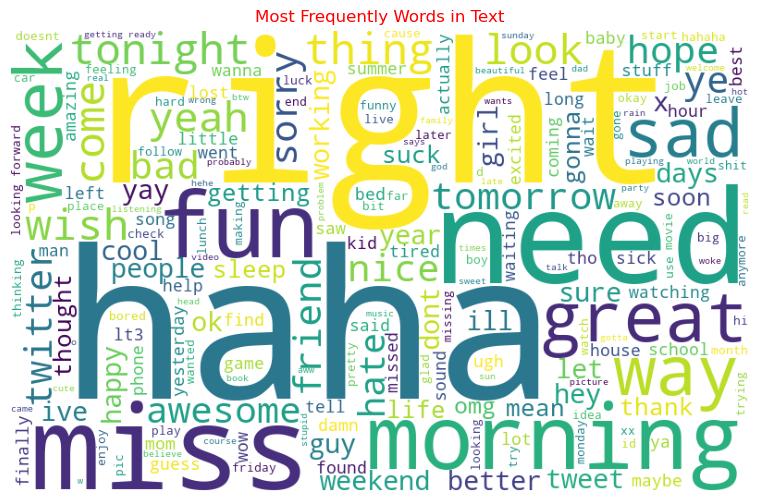

In [380]:
wc = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.title('Most Frequently Words in Text', color='red')
plt.axis('off')
plt.show()

## TextBlob for:
- Spelling Correction
- Tokenization
- Detecting Nouns
- Language Translation and Detection

### Spelling correction

In [381]:
#!pip install textblob
#!python -m textblob.download_corpora

In [382]:
from textblob import TextBlob
from textblob.exceptions import TranslatorError

In [383]:
x = 'thankks forr reading it'

In [384]:
x = TextBlob(x).correct()
x

TextBlob("thanks for reading it")

### Tokenization

In [385]:
x = 'thanks#watching this video. please like it'

In [386]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [387]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


### Lemmatization

In [388]:
x = "runs run running runner ran"

In [389]:
from textblob import Word

In [390]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
runner
ran


In [391]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
runner
run


### Detecting Entities using NER

In [392]:
x = "New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid on outbreak, becoming the latest national flash point over refusals to inoculate against dangeraus diseases. At least 285 people have contracted measles in the city since September, mostly in Brooklyn's Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday. The mandate orders all unvaccinated people in the area, including a concentration of Orthod ox Jews, to receive incluations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000."

In [393]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

New York City - GPE - Countries, cities, states
Tuesday - DATE - Absolute or relative dates or periods
At least 285 - CARDINAL - Numerals that do not fall under another type
September - DATE - Absolute or relative dates or periods
Brooklyn - GPE - Countries, cities, states
Williamsburg - GPE - Countries, cities, states
four - CARDINAL - Numerals that do not fall under another type
Zip - PERSON - People, including fictional
Bill de Blasio - PERSON - People, including fictional
Tuesday - DATE - Absolute or relative dates or periods
Orthod - ORG - Companies, agencies, institutions, etc.
Jews - NORP - Nationalities or religious or political groups
as young as 6 months old - DATE - Absolute or relative dates or periods
up to $1,000 - MONEY - Monetary values, including unit


In [394]:
from spacy import displacy

In [395]:
displacy.render(doc, style="ent")

### Noun Detection

In [396]:
x = 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine to moon'

In [397]:
doc = nlp(x)
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
mine
moon


### Translation and Language Detection
>   Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [398]:
#!pip install translate
#!pip install langdetect

Detecting

In [399]:
from langdetect import detect

In [400]:
x = 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine to moon'
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine to moon'

In [401]:
detect(x)

'en'

Translation

In [402]:
from translate import Translator

In [403]:
translator = Translator(to_lang="de")
translator.translate(x)

'Eilmeldung: Donald Trump, der Präsident der USA, will einen Vertrag über die Mine to Moon unterzeichnen'

### Using Inbuilt `Sentiment Classifier`

In [404]:
from textblob.sentiments import NaiveBayesAnalyzer

In [405]:
x = 'we all stands together. we are gonna win this fight'

In [406]:
TextBlob(x, analyzer= NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)

## ADVANCED TEXT PROCESSING

### N-Grams

In [407]:
x = 'we all stands together. we are gonna win this fight'

In [408]:
tb = TextBlob(x)

In [409]:
tb.ngrams(3)

[WordList(['we', 'all', 'stands']),
 WordList(['all', 'stands', 'together']),
 WordList(['stands', 'together', 'we']),
 WordList(['together', 'we', 'are']),
 WordList(['we', 'are', 'gon']),
 WordList(['are', 'gon', 'na']),
 WordList(['gon', 'na', 'win']),
 WordList(['na', 'win', 'this']),
 WordList(['win', 'this', 'fight'])]

### Bag of Words `BoW`

In [410]:
x = ["this is first sentence", "this is second", "this is last"]

In [411]:
from sklearn.feature_extraction.text import CountVectorizer

In [412]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [413]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]])

In [414]:
bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names_out())
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


### Term Frequency
Term Frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

In [415]:
x

['this is first sentence', 'this is second', 'this is last']

In [416]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [417]:
bow.shape

(3, 6)

In [418]:
tf = bow/bow.shape[1]
for index, row in enumerate(bow.iterrows()):
    for col in row[1].index:
        bow.loc[index,col] = bow.loc[index,col]/sum(row[1].values)

In [419]:
bow

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


### Inverse Document Frequency `IDF`
idf = log((1+N)/(n+1)) + used in sklearn when smooth_idf=True
where, `N` is the total number of rows and `n` is the number of rows in which the word was present

In [420]:
import numpy as np

In [421]:
x_df = pd.DataFrame(x, columns=['words'])
x_df

,words
0,this is first sentence
1,this is second
2,this is last


In [422]:
bow

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


In [423]:
N = bow.shape[0]
N

3

In [424]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [425]:
bb[['this','is','first']].sum()

this     3
is       3
first    1
dtype: int64

In [426]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [427]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

nz

[1, 3, 1, 1, 1, 3]

In [428]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index]+1))+1)

idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [429]:
bow

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


### TFIDF

In [430]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [431]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [432]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.        , 0.6088451 ,
        0.35959372],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [433]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [434]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### Word Embeddings
#### SpaCy `Word2Vec`

In [435]:
#!python -m spacy download en_core_web_lg

In [436]:
nlp = spacy.load('en_core_web_lg')

In [437]:
doc = nlp('thank you! dog cat lion azbycv')

In [438]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
azbycv False


In [439]:
token.vector, token.vector.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [440]:
nlp('cat').vector.shape

(300,)

In [441]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.5647585391998291
thank ! 0.5214740633964539
thank dog 0.2504264712333679
thank cat 0.20648488402366638
thank lion 0.13629762828350067
thank azbycv 0.0

you thank 0.5647585391998291
you you 1.0
you ! 0.43902233242988586
you dog 0.36494097113609314
you cat 0.3080797791481018
you lion 0.20392055809497833
you azbycv 0.0

! thank 0.5214740633964539
! you 0.43902233242988586
! ! 1.0
! dog 0.298522025346756
! cat 0.2970234751701355
! lion 0.19601382315158844
! azbycv 0.0

dog thank 0.2504264712333679
dog you 0.36494097113609314
dog ! 0.298522025346756
dog dog 1.0
dog cat 0.8016854524612427
dog lion 0.4742448031902313
dog azbycv 0.0

cat thank 0.20648488402366638
cat you 0.3080797791481018
cat ! 0.2970234751701355
cat dog 0.8016854524612427
cat cat 1.0
cat lion 0.5265436768531799
cat azbycv 0.0

lion thank 0.13629762828350067
lion you 0.20392055809497833
lion ! 0.19601382315158844
lion dog 0.4742448031902313
lion cat 0.5265436768531799
lion lion 1.0
lion azbycv 0.0


## Machine Learning Models for Text Classification

### BoW

In [442]:
df.shape

(1600000, 13)

In [443]:
df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [444]:
dfr = pd.concat([df0, df4], ignore_index=True)
dfr.shape

(4000, 13)

In [445]:
dfr.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
0,jonhatesyou aw dear sorry,0,6,34,4.666667,1,0,1,0,0,[],0,0
1,j23rd actually wanted wait aft graduated japan...,0,28,133,3.750000,10,0,1,0,6,[],0,0
2,yannick poor boyxx,0,5,31,5.200000,2,0,0,0,0,[],0,0
3,bad,0,2,8,3.000000,0,0,0,0,0,[],0,0
4,donnajonesmcfly sorry hear better hun rest tom...,0,14,81,4.785714,6,0,1,0,0,[],0,0


In [446]:
dfr_feat = dfr.drop(labels=['tweets','sentiment','emails'], axis=1).reset_index(drop=True)
dfr_feat

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,url_flags
0,6,34,4.666667,1,0,1,0,0,0,0
1,28,133,3.750000,10,0,1,0,6,0,0
2,5,31,5.200000,2,0,0,0,0,0,0
3,2,8,3.000000,0,0,0,0,0,0,0
4,14,81,4.785714,6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,7,34,3.857143,3,0,1,0,0,0,0
3996,4,36,8.000000,1,0,1,0,0,0,0
3997,14,71,4.071429,8,0,1,0,0,0,0
3998,7,46,5.571429,0,0,0,0,0,0,0


In [447]:
y = dfr['sentiment']

In [448]:
from sklearn.feature_extraction.text import CountVectorizer

In [449]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['tweets'])

In [450]:
text_counts.toarray().shape

(4000, 9953)

In [451]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names_out())
dfr_bow.head(2)

,00,04,08,0lder,0s,10,100,10000,1000th,100k,...,âwell,âª,âââs,ãªããï½ããããããåäççãèµããã¾ããã,änteractum,æçç¾éºæè,ï½700,ï½i,ï½ï½h,ñññð¹
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ML Algorithms

In [452]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

In [453]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv=2, random_state=42, max_iter=200)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [454]:
clf = {
    'SGD': sgd,
    'LGR': lgr,
    'LGR-CV': lgrcv,
    'SVM': svm,
    'RFC': rfc,
}

In [455]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [456]:
def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    for key in clf.keys():
        clf[key].fit(X_train,y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test,y_pred)
        print(key,  "--->",ac)

In [457]:
%%time
classify(dfr_bow, y)

SGD ---> 0.6475
LGR ---> 0.6675
LGR-CV ---> 0.65
SVM ---> 0.64625
RFC ---> 0.65875
CPU times: user 2min 1s, sys: 2.46 s, total: 2min 4s
Wall time: 20.6 s


#### Manual Feature

In [458]:
dfr_feat.head(2)

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,url_flags
0,6,34,4.666667,1,0,1,0,0,0,0
1,28,133,3.750000,10,0,1,0,6,0,0


In [459]:
%%time
classify(dfr_feat, y)

SGD ---> 0.595
LGR ---> 0.58625
LGR-CV ---> 0.5875
SVM ---> 0.5875
RFC ---> 0.55375
CPU times: user 2 s, sys: 1.06 s, total: 3.06 s
Wall time: 496 ms


#### Manual + Bow

In [460]:
X = dfr_feat.join(dfr_bow)

In [461]:
%%time
classify(X, y)

SGD ---> 0.6575
LGR ---> 0.66875
LGR-CV ---> 0.67125
SVM ---> 0.6575
RFC ---> 0.64875
CPU times: user 1min 8s, sys: 2.01 s, total: 1min 10s
Wall time: 12.2 s


#### TFIDF

In [462]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [463]:
dfr.shape

(4000, 13)

In [464]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['tweets'])

In [465]:
%%time
classify(pd.DataFrame(X.toarray()), y)

SGD ---> 0.64125
LGR ---> 0.6575
LGR-CV ---> 0.64875
SVM ---> 0.6475
RFC ---> 0.63375
CPU times: user 2min 3s, sys: 2.01 s, total: 2min 5s
Wall time: 19.9 s


#### Word2Vec

In [466]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [467]:
%%time
dfr['vec'] = dfr['tweets'].apply(lambda x: get_vec(x))

CPU times: user 12.5 s, sys: 206 ms, total: 12.7 s
Wall time: 12.8 s


In [468]:
X = np.concatenate(dfr['vec'].to_numpy(), axis=0)
X.shape

(4000, 300)

In [469]:
%%time
classify(pd.DataFrame(X), y)

SGD ---> 0.66375
LGR ---> 0.68875
LGR-CV ---> 0.69375
SVM ---> 0.675
RFC ---> 0.685
CPU times: user 14.4 s, sys: 421 ms, total: 14.8 s
Wall time: 2.33 s


In [470]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, "--->", y_pred)

In [471]:
predict_w2v("hi, thanks for reading this page. come to me please")

SGD ---> [4]
LGR ---> [4]
LGR-CV ---> [4]
SVM ---> [4]
RFC ---> [0]


In [472]:
predict_w2v("Dearest virtual assistant, I extend my sincere gratitude for your presence and assistance")

SGD ---> [0]
LGR ---> [4]
LGR-CV ---> [0]
SVM ---> [4]
RFC ---> [0]
